# Analyzing CIA Factbook Data

In [141]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [142]:
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Minimum Population

In [143]:
q_min_pop = "SELECT MIN(population) AS Smallest_Population FROM facts;"
pd.read_sql_query(q_min_pop, conn)

,Smallest_Population
0,0


# Maximum Population

In [144]:
q_max_pop = "SELECT MAX(population) AS Largest_Population FROM facts;"
pd.read_sql_query(q_max_pop, conn)

,Largest_Population
0,7256490011


# Minimum population growth

In [145]:
q_min_growth = "SELECT MIN(population_growth) AS Lowest_Population_Growth FROM facts WHERE population_growth > 0.0"
pd.read_sql_query(q_min_growth, conn)

,Lowest_Population_Growth
0,0.01


# Maximum population growth

In [146]:
q_max_growth = "select max(population_growth) AS Highest_Population_Growth from facts"
pd.read_sql_query(q_max_growth, conn)

,Highest_Population_Growth
0,4.02


# Write a query that returns the countrie(s) with a population of 0.


In [147]:
q_pop_zero = "SELECT name AS Country FROM facts WHERE population == 0;"
pd.read_sql_query(q_pop_zero, conn)

,Country
0,Antarctica


# Write a query that returns the countrie(s) with a population of 7256490011.

In [148]:
q_pop_alot = "select name from facts where (population == 7256490011 or population > 7200000000);"
pd.read_sql_query(q_pop_alot, conn)

,name
0,World


# Observations

- The coldest country has no human population though it hasn't defined what _residing_ in a place means since Antartica has many _visitors_ and scientists there.
- The World isn't a country
- Greece has the lowest population growth
- South Sudan has the highest population growth

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118314eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1184170b8>]], dtype=object)

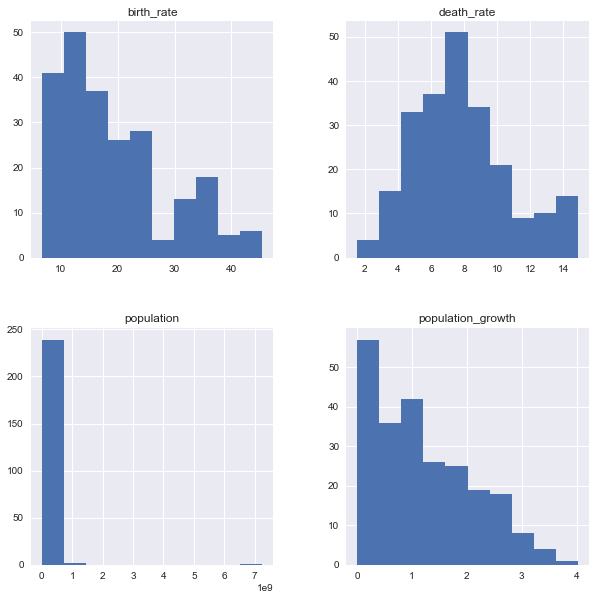

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q_plot = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE name != 'World' or name != 'Antartica';"
pd.read_sql_query(q_plot, conn).hist(ax=ax)

# Population Density per square km

In [152]:
q_pop_density = "SELECT name AS Country,(population / area) AS People_SquareKM FROM facts WHERE name != 'World' OR name != 'Antartica' ORDER BY People_SquareKM DESC LIMIT 5;"
pd.read_sql_query(q_pop_density, conn)

,Country,People_SquareKM
0,Macau,21168
1,Monaco,15267
2,Singapore,8141
3,Hong Kong,6445
4,Gaza Strip,5191


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117f22cc0>], dtype=object)

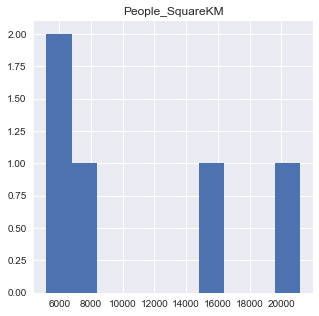

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

pd.read_sql_query(q_pop_density, conn).hist(ax=ax)

# Which countries have the highest ratios of water to land?

In [163]:
q_water2_land = "SELECT name AS Country, (area / area_water - 1) AS land_water_ratio FROM facts ORDER BY land_water_ratio DESC LIMIT 10;"
pd.read_sql_query(q_water2_land, conn)

,Country,land_water_ratio
0,Bosnia and Herzegovina,5118
1,Morocco,1785
2,Guinea,1755
3,Costa Rica,1276
4,Djibouti,1159
5,"Korea, North",926
6,Cyprus,924
7,Namibia,821
8,Burkina Faso,684
9,"Congo, Republic of the",683


# Which countries have more water than land?

In [164]:
q_more_water = "SELECT name AS Country, (area / area_water - 1) AS land_water_ratio FROM facts WHERE land_water_ratio >= 0 ORDER BY land_water_ratio ASC LIMIT 10;"
pd.read_sql_query(q_more_water, conn)

,Country,land_water_ratio
0,British Indian Ocean Territory,0
1,Virgin Islands,0
2,Puerto Rico,1
3,"Bahamas, The",2
4,Guinea-Bissau,3
5,Malawi,3
6,Netherlands,4
7,Uganda,4
8,Eritrea,6
9,Liberia,6
